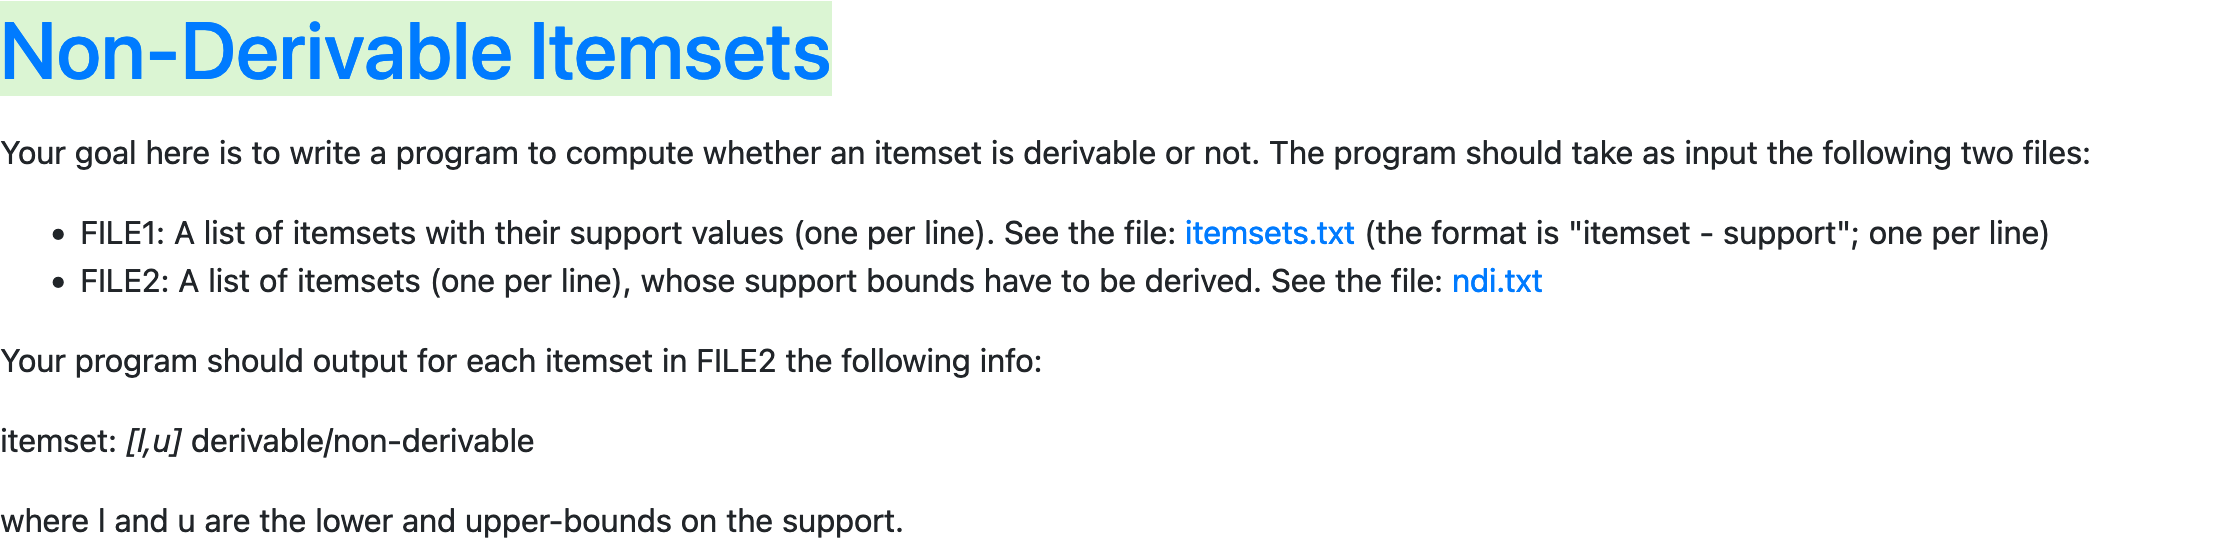

In [1]:
import numpy as np
from itertools import combinations
from collections import defaultdict

In [2]:
def nditem(file1='data/itemsets.txt', file2='data/ndi.txt'):
    def IE(Y, X):
        """
        Calculate IE(Y) for inclusion-exclusion on subset Y of itemset X
        """
        Y = np.array(Y)
        X = np.array(X)
        remaining = np.setdiff1d(X, Y)
        remaining_len = remaining.shape[0]
        ie = 0

        for i in range(remaining_len):
            for subset in combinations(remaining, i):
                combined = tuple(np.union1d(Y, np.array(subset)))
                if (remaining_len - i + 1) % 2 == 0:
                    ie += supports[combined]
                else:
                    ie -= supports[combined]
        return ie

    def support_bounds(itemset):
        """
        Calculate lower and upper support bounds for the itemset using inclusion-exclusion.
        """
        upper_bound = np.inf
        lower_bound = 0
        itemset_len = len(itemset)

        for i in range(itemset_len + 1):
            for subset in combinations(itemset, i):
                ie = IE(subset, itemset)
                if (itemset_len - i) % 2 == 1:
                    upper_bound = min(upper_bound, ie)
                else:
                    lower_bound = max(lower_bound, ie)

        return lower_bound, upper_bound
    
    # read files
    with open(file1, 'r') as f1:
        lines = f1.read().splitlines()
        tid_num = int(lines[0].split('-')[-1])  # number of tids
        lines = lines[1:]

    supports = dict()
    supports[()] = tid_num

    for line in lines:
        itemset_text, support_text = line.split('-')
        support = int(support_text.strip())
        itemset = tuple(np.array(itemset_text.split()).astype(int))
        supports[itemset] = support

    with open(file2, 'r') as f2:
        lines = f2.read().splitlines()

    # result
    itemsets = [np.array(line.split()).astype(int) for line in lines]
    for itemset in itemsets:
        lb, ub = support_bounds(itemset)
        print(f"{' '.join(itemset.astype(str))}: [{lb}, {ub}] {'derivable' if lb == ub else 'non-derivable'}")    

In [3]:
nditem()

29 34 40 52 62: [2888, 2888] derivable
7 29: [3061, 3076] non-derivable
29 48 58: [2997, 2997] derivable
7 29 36 40 52 58 60: [2890, 2890] derivable
5 40 52 60: [2893, 2893] derivable
7 36 40 58: [2952, 2952] derivable
36 40 52 58 60 66: [2888, 2888] derivable
